In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

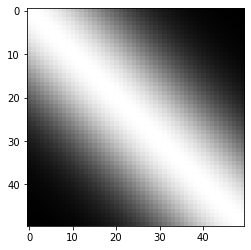

In [6]:

rows = 100
cols = 100
sigma = 20

row = np.arange(rows).reshape(-1, 1)  # reshape to column vector
col = np.arange(cols)

G = np.exp(-(np.abs(row - col) / sigma)**2)

seq_len = 50
score = np.ones((seq_len, seq_len))
G = G[:seq_len, :seq_len]
value = G * score

plt.imshow(value, cmap='gray')
plt.show()
    